# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [3]:
# Import your libraries:

%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [4]:
# loading the data:

customer = pd.read_csv('../data/Wholesale customers data.csv')
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
# Your code here:
customer.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
customer.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
customer.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
print(f"Number of regions: {customer['Region'].unique()}")
print(f"Number of channels: {customer['Channel'].unique()}")

Number of regions: [3 1 2]
Number of channels: [2 1]


In [9]:
# Your observations here

#There's no categorical values, neither missing values
#There's only 3 regions, and two channels
#Our distributions are skewed
#Theres a remarkable diference of values on each type of product 


"""
1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
 """

'\n1) FRESH: annual spending (m.u.) on fresh products (Continuous);\n2) MILK: annual spending (m.u.) on milk products (Continuous);\n3) GROCERY: annual spending (m.u.)on grocery products (Continuous);\n4) FROZEN: annual spending (m.u.)on frozen products (Continuous)\n5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\n6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);\n7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)\n8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)\n '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f585fd51690>,
      dtype=object)

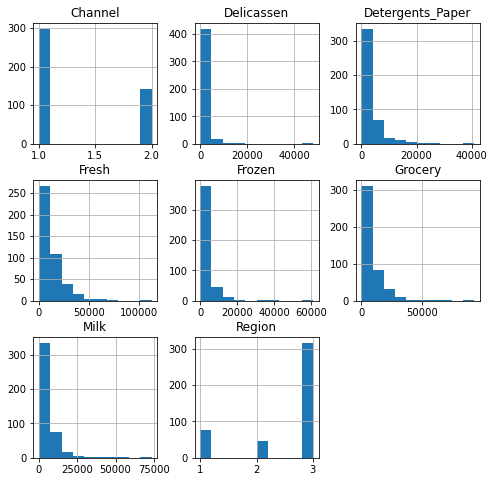

In [10]:
customer.hist(figsize=(8,8))

In [ ]:

#Looking at the region's histogram we can see that the 3rd region have
#the majority of purchases so we can say that it is clearly skewed
#and Pareto principle can be considered true here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
# Your code here
reg_chan_df = customer[['Region', 'Channel']]
reg_chan_df

,Region,Channel
0,3,2
1,3,2
2,3,2
3,3,1
4,3,2
...,...,...
435,3,1
436,3,1
437,3,2
438,3,1


In [12]:
customer.drop(['Channel', 'Region'],axis=1, inplace=True)

In [13]:
customer

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [ ]:
# Your comment here
#Here I would make a drop of the channel and region columns but Im not sure of doing that

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [14]:
# Your code here:


scaler = StandardScaler()
customers_scale = scaler.fit_transform(customer)

customers_scale

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [15]:
# Your code here:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42).fit(customers_scale)

kmeans

#I dont know where to use labels_, where do I find the labels since its unsupervised I shouldnt have to put the labels myself

KMeans(n_clusters=6, random_state=42)

In [16]:
customer['Labels'] = kmeans.labels_

In [17]:
customer

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,5
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,5
436,39228,1431,764,4510,93,2346,5
437,14531,15488,30243,437,14841,1867,3
438,10290,1981,2232,1038,168,2125,0


In [18]:
kmeans.predict(customers_scale)

array([0, 3, 3, 0, 5, 0, 0, 0, 0, 3, 3, 0, 5, 3, 3, 0, 3, 0, 0, 0, 0, 0,
       5, 3, 3, 0, 0, 0, 3, 5, 0, 0, 0, 5, 0, 3, 5, 3, 3, 5, 5, 0, 3, 3,
       3, 3, 3, 1, 3, 3, 0, 0, 5, 3, 5, 0, 1, 3, 0, 0, 0, 1, 0, 3, 0, 1,
       0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 1, 1, 5,
       0, 5, 0, 0, 1, 4, 3, 0, 0, 0, 0, 0, 3, 3, 0, 5, 0, 0, 3, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 3, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       5, 0, 0, 0, 0, 5, 3, 2, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 5, 3,
       0, 0, 3, 3, 5, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 0, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 5, 3, 5, 0, 0, 5, 5, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 5, 5, 5, 5,
       0, 0, 0, 5, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,

In [20]:
kmeans.cluster_centers_[0]

array([-0.21343885, -0.38347512, -0.43918099, -0.08333701, -0.40302183,
       -0.18755896])

Count the values in `labels`.

In [21]:
# Your code here:
customer.Labels.value_counts()


0    280
3     98
5     49
1     10
4      2
2      1
Name: Labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [22]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan_c = DBSCAN(eps=0.5).fit(customers_scale)

dbscan_c


DBSCAN()

Count the values in `labels_DBSCAN`.

In [23]:
# Your code here
customer['Labels_DBSCAN'] = dbscan_c.labels_


In [24]:
customer.Labels_DBSCAN.value_counts()

 0    261
-1    174
 1      5
Name: Labels_DBSCAN, dtype: int64

In [25]:
customer

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels,Labels_DBSCAN
0,12669,9656,7561,214,2674,1338,0,0
1,7057,9810,9568,1762,3293,1776,3,0
2,6353,8808,7684,2405,3516,7844,3,-1
3,13265,1196,4221,6404,507,1788,0,0
4,22615,5410,7198,3915,1777,5185,5,-1
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,5,-1
436,39228,1431,764,4510,93,2346,5,-1
437,14531,15488,30243,437,14841,1867,3,-1
438,10290,1981,2232,1038,168,2125,0,0


In [ ]:
#here most of the data is labeled as noise. I fixed bc I was putting
#min_samples value too high.

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, ' Detergents-Milk DBSCAN by labels_')

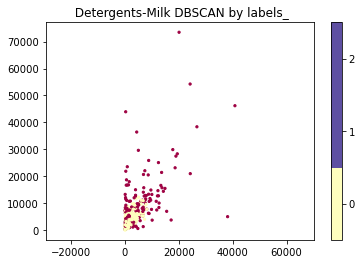

In [26]:
# Your code here:
plt.scatter(customer.Detergents_Paper, customer.Milk, c=dbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan_c.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(dbscan_c.labels_))))
plt.title(' Detergents-Milk DBSCAN by labels_')


Text(0.5, 1.0, 'Detergents-Milk KMEANS by labels_')

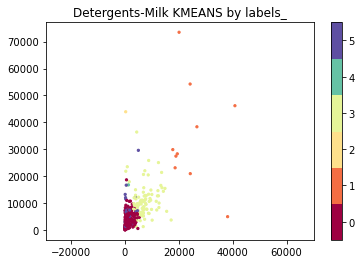

In [27]:
plt.scatter(customer.Detergents_Paper, customer.Milk, c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(kmeans.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(kmeans.labels_))))
plt.title('Detergents-Milk KMEANS by labels_')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'Grocery-Fresh DBSCAN by labels_')

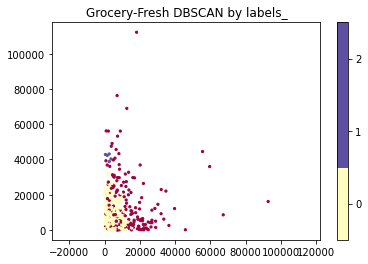

In [28]:
# Your code here:
plt.scatter(customer.Grocery, customer.Fresh, c=dbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan_c.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(dbscan_c.labels_))))
plt.title('Grocery-Fresh DBSCAN by labels_')


Text(0.5, 1.0, 'Groceries-Fresh KMEANS by labels_')

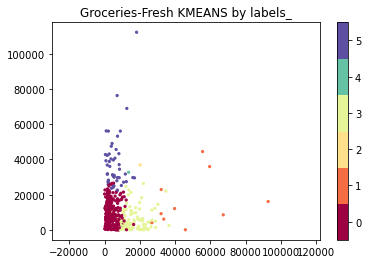

In [29]:
plt.scatter(customer.Grocery, customer.Fresh, c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(kmeans.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(kmeans.labels_))))
plt.title('Groceries-Fresh KMEANS by labels_')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'Frozen-Delicassen DBSCAN by labels_')

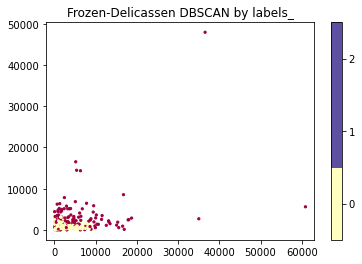

In [31]:
# Your code here:
plt.scatter(customer.Frozen, customer.Delicassen, c=dbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan_c.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(dbscan_c.labels_))))
plt.title('Frozen-Delicassen DBSCAN by labels_')

Text(0.5, 1.0, 'Frozen-Delicassen DBSCAN by labels_')

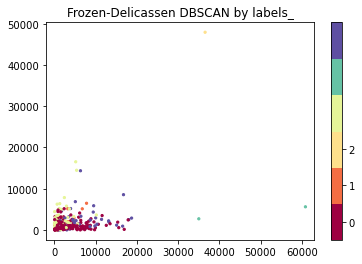

In [34]:
plt.scatter(customer.Frozen, customer.Delicassen, c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(kmeans.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(dbscan_c.labels_))))
plt.title('Frozen-Delicassen DBSCAN by labels_')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [43]:
# Your code here:



customer.groupby(by=['Labels', 'Labels_DBSCAN']).mean()

Fresh          Milk       Grocery        Frozen  \
Labels Labels_DBSCAN                                                           
0      -1              9011.520000   4923.340000   5485.400000   5220.300000   
        0              9367.504348   2544.500000   3412.200000   2112.930435   
1      -1             15964.900000  34708.500000  48536.900000   3054.600000   
2      -1             36847.000000  43950.000000  20170.000000  36534.000000   
3      -1              6903.605634  11794.366197  18477.422535   1841.352113   
        0              3088.740741   7912.222222  11594.259259    597.148148   
4      -1             22015.500000   9937.000000   7844.000000  47939.000000   
5      -1             38367.625000   6139.875000   6881.000000   6952.575000   
        0             29753.000000   1078.750000   1809.750000   2589.750000   
        1             41446.600000   1421.200000   2167.600000   1276.400000   

                      Detergents_Paper    Delicassen  
Labels Labels_DBSCAN                                  
0      -1                  1434.400000   1664.560000  
        0                   859.460870    851.313043  
1      -1                 24875.200000   2942.800000  
2      -1                   239.000000  47943.000000  
3      -1                  7792.676056   2247.267606  
        0                  5421.222222   1136.407407  
4      -1                   671.500000   4153.500000  
5      -1                  1134.125000   2710.350000  
        0                   257.000000    914.500000  
        1                   416.200000    784.800000

Which algorithm appears to perform better?

In [44]:
# Your observations here


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels,Labels_DBSCAN
0,12669,9656,7561,214,2674,1338,0,0
1,7057,9810,9568,1762,3293,1776,3,0
2,6353,8808,7684,2405,3516,7844,3,-1
3,13265,1196,4221,6404,507,1788,0,0
4,22615,5410,7198,3915,1777,5185,5,-1
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,5,-1
436,39228,1431,764,4510,93,2346,5,-1
437,14531,15488,30243,437,14841,1867,3,-1
438,10290,1981,2232,1038,168,2125,0,0


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [50]:
# Your code here

kmeans_1 = KMeans(n_clusters=6, random_state=42).fit(customers_scale)

customer['Labels'] = kmeans_1.labels_
kmeans.cluster_centers_[0]
customer.Labels.value_counts()

0    280
3     98
5     49
1     10
4      2
2      1
Name: Labels, dtype: int64

In [48]:
kmeans_1 = KMeans(n_clusters=3, random_state=42).fit(customers_scale)

customer['Labels'] = kmeans_1.labels_
kmeans.cluster_centers_[0]
customer.Labels.value_counts()

0    318
2    109
1     13
Name: Labels, dtype: int64

In [49]:
kmeans_1 = KMeans(n_clusters=20, random_state=42).fit(customers_scale)

customer['Labels'] = kmeans_1.labels_
kmeans.cluster_centers_[0]
customer.Labels.value_counts()

14    106
1      69
0      55
17     45
11     36
15     31
5      25
4      20
9      18
19     10
13      8
6       5
10      3
2       3
18      1
8       1
7       1
12      1
3       1
16      1
Name: Labels, dtype: int64

In [ ]:
# Your comment here

"""Changing n_labels can mess our prediction model prediction up, simply bc if we put too many n_labels
the model is going to divide products into labels that don't really exist 
just to cover the number of labels we gave it, if we dont put enough n_labels the model
will put products into the same label that shouldn't be together, just because it doesn't have enough labels
to add them to."""

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [52]:
# Your code here

dbscan_c = DBSCAN(eps=1, min_samples=10).fit(customers_scale)
customer['Labels_DBSCAN'] = dbscan_c.labels_
customer.Labels_DBSCAN.value_counts()

 0    386
-1     54
Name: Labels_DBSCAN, dtype: int64

In [53]:
dbscan_c = DBSCAN(eps=5, min_samples=20).fit(customers_scale)
customer['Labels_DBSCAN'] = dbscan_c.labels_
customer.Labels_DBSCAN.value_counts()

 0    435
-1      5
Name: Labels_DBSCAN, dtype: int64

In [54]:
dbscan_c = DBSCAN(eps=0.2, min_samples=3).fit(customers_scale)
customer['Labels_DBSCAN'] = dbscan_c.labels_
customer.Labels_DBSCAN.value_counts()

-1     371
 2      22
 1      13
 7       5
 9       4
 0       4
 11      3
 10      3
 8       3
 6       3
 5       3
 4       3
 3       3
Name: Labels_DBSCAN, dtype: int64

In [ ]:
# Your comment here
"""the broader we put the eps the less """